<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: center;"><font size="10"><b>Unsupervised Learning - FIFA 23</b></font></div></font></td></tr></table>

<div style="text-align:center">
<img src="https://github.com/milanfx/DTSA-5304/blob/main/image/background3.png?raw=true" alt="image description" width="800">
</div>

<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: left;"><font size="4"><b>1. Project Introduction</b></font></div></font></td></tr></table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>1.1 Dataset Background:</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">I have been playing FIFA games since 2002, all the way up to FIFA23. Over the past decade, the level of detail in FIFA games has been continuously improving, and the accuracy and reasonableness of the data have also been continuously improved, approaching the level of another football management game called FM. I hope to explore the relationships behind the data more deeply through analysis of the FIFA23 player database during this project.</font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>1.2 Project Goals:</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">Exploring the realationship between a player's skills ratings and his position in the FIFA23 database using Cluster and Classification methods.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3"><b>>>Cluster and Classification project: Predicting a player's position based on his general ratings.</b></font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>1.3 Data Saurces:</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">The dataset is from Kaggle:</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">https://www.kaggle.com/datasets/cashncarry/fifa-23-complete-player-dataset</font></div></td></tr>
</table>

<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: left;"><font size="4"><b>2. Data Cleaning</b></font></div></font></td></tr></table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.1 Import Library</b></font></div></td></tr>
</table>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.2 Data Loading</b></font></div></td></tr>
</table>

In [2]:
df = pd.read_csv(r'players_fifa23.csv')
print(df.shape)

(18539, 90)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>>>Dataset Columns Include: 90 Attributes</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3"><b>>>Dataset Rows Include: 18539 Players</b></font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.3 Feature Selection</b></font></div></td></tr>
</table>

In [3]:
df1 = df[['ID', 'Name', 'Club', 'BestPosition', 
          'Overall', 'PaceTotal', 'ShootingTotal', 
          'PassingTotal', 'DribblingTotal', 
          'DefendingTotal', 'PhysicalityTotal']]
print(df1.shape)

(18539, 11)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>In this project, we will only keep the player's name, club, position, and category attributes.</font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.4 Missing Value Checking</b></font></div></td></tr>
</table>

In [4]:
missing_values = df1.isna().sum()
missing_values.info()

<class 'pandas.core.series.Series'>
Index: 11 entries, ID to PhysicalityTotal
Series name: None
Non-Null Count  Dtype
--------------  -----
11 non-null     int64
dtypes: int64(1)
memory usage: 176.0+ bytes


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>There is no missing value after feature selection.</font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.5 Duplicate Value Checking</b></font></div></td></tr>
</table>

In [5]:
duplicate_rows = df1[df1.duplicated()]
duplicate_rows.shape

(119, 11)

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>There are 119 duplicate rows, which we need to remove from the dataset.</font></div></td></tr>
</table>

In [6]:
df2 = df1.drop_duplicates()
print(df2.shape)

(18420, 11)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.6 Subset Selection </b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">Because the requirements for goalkeepers' attributes are different from those for other positions, it is not suitable to analyze them together. Therefore, goalkeepers are removed from the observations.</font></div></td></tr>
</table>

In [7]:
# Remove Goalkeeper
df3 = df2[df2['BestPosition'] != 'GK']
print(df3.shape)

(16367, 11)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.7 Data Cleaning Summary</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>1. After data cleaning, our dataset now has 1 features and 16367 players. </font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>2. Next, we will conduct EDA to further explore the data, which may require further cleaning.</font></div></td></tr>
</table>

<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: left;"><font size="4"><b>3. Exploratory Data Analysis</b></font></div></font></td></tr></table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>3.1 Distribution of player technical attributes</b></font></div></td></tr>
</table>

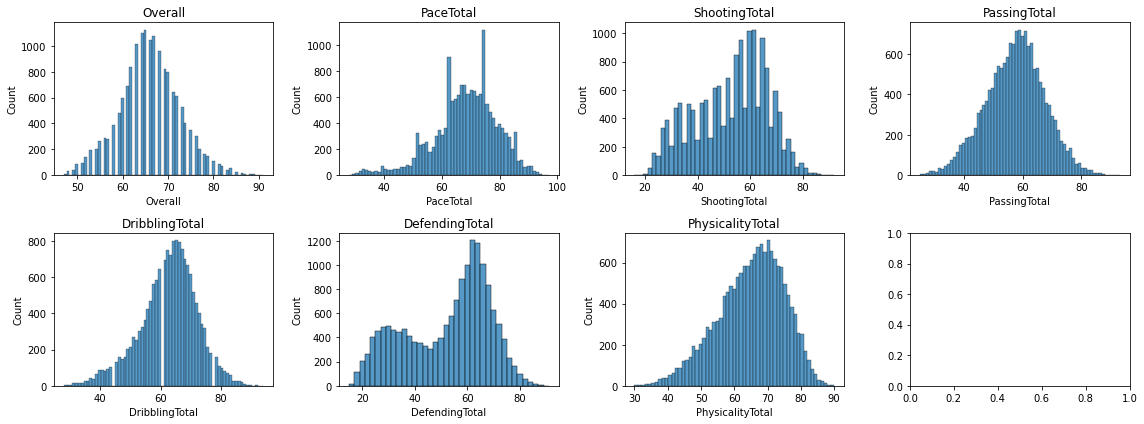

In [8]:
int_features = df3.select_dtypes(include=['int']).drop(
    'ID',axis=1).columns.tolist()

# 2 x 4 row = 7 images
num_features = len(int_features)
num_cols = 4
num_rows = num_features // num_cols + (num_features % num_cols > 0)

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 6))
for i, feature in enumerate(int_features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    sns.histplot(df3[feature], kde=False, ax=axs[row_idx][col_idx])
    axs[row_idx][col_idx].set_title(feature)
    
plt.tight_layout()
plt.show()

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>Almost all distributions are close to a normal distribution, besides shooting and defending.</font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>3.2 Distribution of player positions</b></font></div></td></tr>
</table>

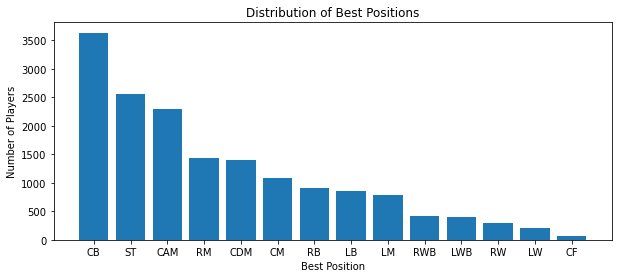

In [9]:
position_count = df3['BestPosition'].value_counts()

fig, ax = plt.subplots(figsize=(10, 4))
plt.bar(position_count.index, position_count.values)
plt.xlabel('Best Position')
plt.ylabel('Number of Players')
plt.title('Distribution of Best Positions')

plt.show()

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>We have 14 different positions and the number of players in each position varies greatly.</font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>3.3 Correlation between positions</b></font></div></td></tr>
</table>

In [10]:
position_stats = df3.groupby('BestPosition').mean()
position_stats = position_stats.drop(['ID', 'Overall'], axis=1)
order = ['CB', 'LB', 'RB', 'LWB', 'RWB', 'CDM', 'CM', 'CAM', 'LM', 'RM', 'LW', 'RW', 'CF', 'ST']
position_stats = position_stats.reindex(order).T
position_stats

BestPosition,CB,LB,RB,LWB,RWB,CDM,CM,CAM,LM,RM,LW,RW,CF,ST
PaceTotal,59.754338,72.841860,73.106870,74.539604,74.887560,61.391117,63.537546,70.133130,77.098734,77.112656,79.488372,79.581081,73.700000,69.586897
ShootingTotal,37.045167,45.079070,44.252999,46.930693,46.363636,52.670487,59.424908,59.663466,59.062025,57.495132,64.920930,64.358108,70.371429,65.204002
PassingTotal,49.709997,57.403488,56.701200,58.688119,58.404306,62.029370,66.769231,63.150589,61.168354,59.672462,62.595349,62.530405,65.700000,53.228325
DribblingTotal,52.453043,62.480233,62.027263,64.074257,63.992823,63.667622,67.885531,68.226975,67.596203,66.430459,71.739535,70.625000,72.928571,63.844645
DefendingTotal,65.642523,61.839535,61.748092,60.794554,61.019139,64.555158,61.521062,45.129638,42.272152,41.545897,35.976744,37.094595,38.185714,30.234994
PhysicalityTotal,71.308455,65.019767,65.567067,65.158416,66.258373,70.352436,66.949634,56.766914,58.753165,58.490960,56.790698,58.456081,63.714286,65.867399


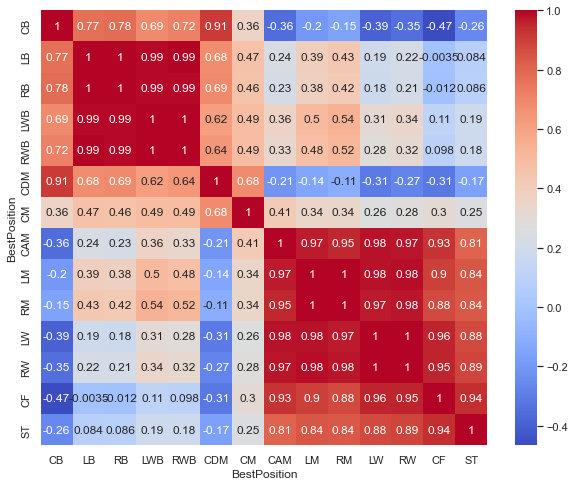

In [11]:
corr_matrix = position_stats.corr()
sns.set()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>There is a strong correlation between many positions of players, which means we can reduce the number of positions by clustering them.</font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>3.3 EDA Summary</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>1. Shooting and Defending rating are not normally distributed. </font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>2. Some of positions show strong correlation .</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>3. Next, we can compress the number of player positions through clustering.</font></div></td></tr>
</table>

<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: left;"><font size="4"><b>4. Cluster Analysis and Classification Analysis</b></font></div></font></td></tr></table>

In [12]:
# Library
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import time

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.1 K-means Clustering </b></font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>We perform standardization to address issues related to data distribution.</font></div></td></tr>
</table>

In [13]:
# Select Features
df3_stats = df3.drop(['ID', 'Name', 'Club', 'BestPosition', 'Overall'], axis=1)
scaler = StandardScaler()
df3_stats = scaler.fit_transform(df3_stats)
df3_stats.shape

(16367, 6)

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>K-means Clustering</font></div></td></tr>
</table>

In [14]:
# K-means
start_time = time.time()
kmeans = KMeans(n_clusters=5,random_state=6) 
kmeans.fit(df3_stats)
klabels = kmeans.predict(df3_stats)
df3['Kmeans'] = klabels
end_time = time.time()
running = end_time - start_time
silhouette_avg = silhouette_score(df3_stats, klabels)
print("Silhouette：", silhouette_avg)
print(f"Running time：{running:.2f}s")
print(df3['Kmeans'].value_counts())

Silhouette： 0.21093245392707327
Running time：2.62s
2    4327
3    3343
4    3066
1    3004
0    2627
Name: Kmeans, dtype: int64


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>Checking Clustering Results</font></div></td></tr>
</table>

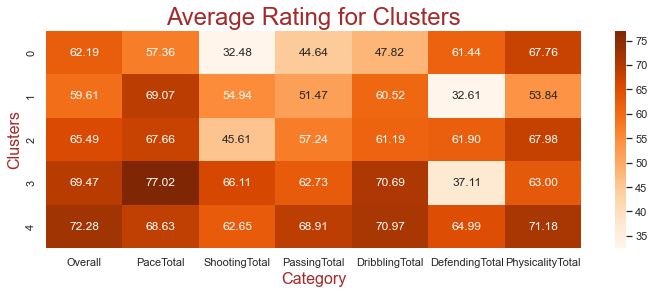

In [15]:
# Calculated Mean
cluster_features = df3.drop(['ID'], axis=1).groupby('Kmeans').mean()
# Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(cluster_features, cmap='Oranges', annot=True, fmt='.2f')
# Labels
plt.title('Average Rating for Clusters', fontsize=24, color='brown')
plt.xlabel('Category', fontsize=16, color='brown')
plt.ylabel('Clusters', fontsize=16, color='brown')

plt.show()

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>The large difference in means between clusters indicates that k-means tends to separate players with high and low overall ratings, rather than considering the distribution of player attributes.</font></div></td></tr>
</table>

In [16]:
key_players = df3[df3['Club'] == 'AC Milan'].groupby('Kmeans').apply(lambda x: x.nlargest(10, 'Overall')).reset_index(drop=True)
print(key_players[['Name', 'Kmeans']].sort_values(by='Kmeans'))

               Name  Kmeans
0         M. Gabbia       0
1         L. Stanga       0
2         F. Tomori       2
3           S. Kjær       2
4          M. Thiaw       2
9          D. Origi       3
8            Brahim       3
10       M. Lazetić       3
6    Z. Ibrahimović       3
5       Rafael Leão       3
7    Junior Messias       3
19        P. Kalulu       4
11     T. Hernández       4
12        S. Tonali       4
13      I. Bennacer       4
14        O. Giroud       4
15      D. Calabria       4
16         A. Rebić       4
17      A. Florenzi       4
18  C. De Ketelaere       4
20  A. Saelemaekers       4


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>From the cluster of Milan players, it can be seen that the clustering results are not closely related to the players' positions, as the majority of Milan players are classified into No.4 clusters.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>The reason is that the significant variation in players' abilities leads to inaccurate clustering, therefore, we need to narrow down our range of observations.</font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.2 K-means Clustering (narrow down) </b></font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>Selecting only the top 1000 ranked players in the world ensures that the players' overall level is more similar, making it easier for clustering to reflect the different distributions of player attributes.</font></div></td></tr>
</table>

In [17]:
# Select Features
df4 = df3.nlargest(1000, 'Overall')
df4_stats = df4.drop(['ID', 'Name', 'Club', 'BestPosition', 'Overall','Kmeans'], axis=1)
scaler = StandardScaler()
df4_stats = scaler.fit_transform(df4_stats)
df4_stats.shape

(1000, 6)

In [18]:
# K-means
start_time = time.time()
kmeans = KMeans(n_clusters=5,random_state=6) 
kmeans.fit(df4_stats)
klabels = kmeans.predict(df4_stats)
df4['Kmeans'] = klabels
end_time = time.time()
running = end_time - start_time
silhouette_avg = silhouette_score(df4_stats, klabels)
print("Silhouette：", silhouette_avg)
print(f"Running time：{running:.2f}s")
print(df4['Kmeans'].value_counts())

Silhouette： 0.24861066427977438
Running time：0.34s
4    263
3    232
1    206
2    175
0    124
Name: Kmeans, dtype: int64


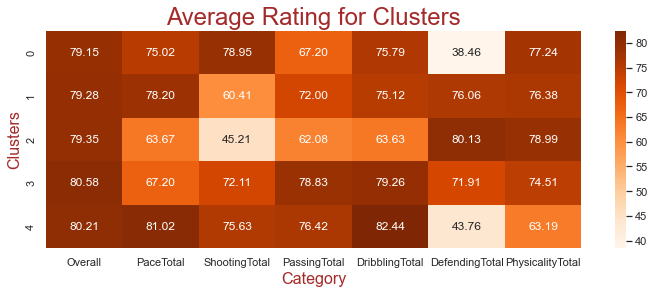

In [19]:
# Calculated Mean
cluster_features = df4.drop(['ID'], axis=1).groupby('Kmeans').mean()
# Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(cluster_features, cmap='Oranges', annot=True, fmt='.2f')
# Labels
plt.title('Average Rating for Clusters', fontsize=24, color='brown')
plt.xlabel('Category', fontsize=16, color='brown')
plt.ylabel('Clusters', fontsize=16, color='brown')

plt.show()

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>Unlike the previous clustering result, this time all clusters have an Overall mean value at the same level.</font></div></td></tr>
</table>

In [20]:
key_players = df4[df4['Club'] == 'AC Milan'].groupby('Kmeans').apply(lambda x: x.nlargest(10, 'Overall')).reset_index(drop=True)
print(key_players[['Name', 'Kmeans']].sort_values(by='Kmeans'))

               Name  Kmeans
9          A. Rebić       0
6         O. Giroud       0
5    Z. Ibrahimović       0
18         D. Origi       0
8       D. Calabria       1
12        P. Kalulu       1
16          S. Dest       1
0      T. Hernández       1
7           S. Kjær       2
3         F. Tomori       2
4       I. Bennacer       3
2         S. Tonali       3
17        R. Krunić       3
11  C. De Ketelaere       3
1       Rafael Leão       4
10      A. Florenzi       4
13  A. Saelemaekers       4
14   Junior Messias       4
15           Brahim       4


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>Almost all of the clustering results for AC Milan players are consistent with the real world.</font></div></td></tr>
</table>

In [21]:
key_players = df4[df4['Club'] == 'Inter'].groupby('Kmeans').apply(lambda x: x.nlargest(10, 'Overall')).reset_index(drop=True)
print(key_players[['Name', 'Kmeans']].sort_values(by='Kmeans'))

             Name  Kmeans
0       R. Lukaku       0
3     L. Martínez       0
7        E. Džeko       0
13     M. Darmian       1
10    D. Dumfries       1
9       R. Gosens       1
15  D. D'Ambrosio       1
16     F. Dimarco       1
4     M. Škriniar       2
11      F. Acerbi       2
6      S. de Vrij       2
8      A. Bastoni       2
5   H. Çalhanoğlu       3
2      N. Barella       3
1     M. Brozović       3
12  H. Mkhitaryan       4
14      J. Correa       4


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>Double check. Inter Milan's clustering results also match the real world.</font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.3 Hierarchical Clustering</b></font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>Comparing the results of hierarchical clustering.</font></div></td></tr>
</table>

In [22]:
# Hierarchical 
start_time = time.time()
hierarchy = AgglomerativeClustering(n_clusters=5, linkage="ward", affinity="euclidean")
hlabels = hierarchy.fit_predict(df4_stats)
df4['Hierarchy'] = hlabels
end_time = time.time()
running = end_time - start_time
silhouette_avg = silhouette_score(df4_stats, hlabels)
print("Silhouette：", silhouette_avg)
print(f"Running time：{running:.2f}s")

Silhouette： 0.22576280673349283
Running time：0.10s


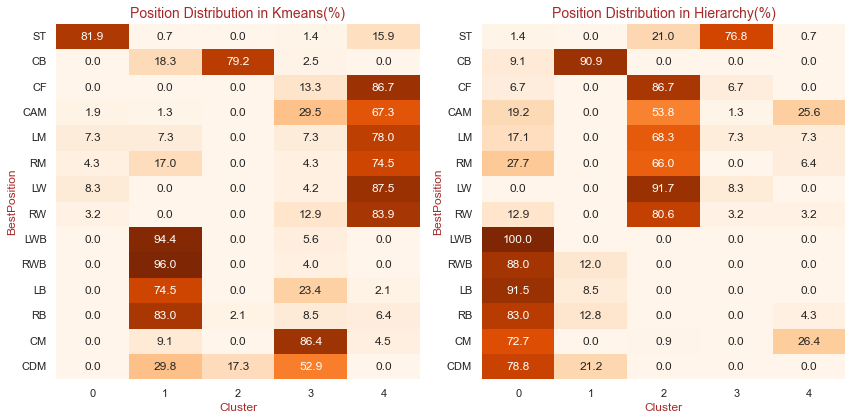

In [23]:
# Create table for Kmeans heatmap
pivot_kmeans = pd.pivot_table(df4, index='BestPosition', columns='Kmeans', aggfunc='size', fill_value=0)
row_sums_kmeans = pivot_kmeans.sum(axis=1)
pos_order_kmeans = ['ST', 'CB', 'CF', 'CAM', 'LM', 'RM', 'LW', 'RW', 'LWB', 'RWB', 'LB', 'RB', 'CM', 'CDM']
pivot_pct_kmeans = pivot_kmeans.div(row_sums_kmeans, axis=0) * 100
pivot_pct_kmeans = pivot_pct_kmeans.reindex(pos_order_kmeans)

# Create table for Hierarchy heatmap
pivot_hierarchy = pd.pivot_table(df4, index='BestPosition', columns='Hierarchy', aggfunc='size', fill_value=0)
row_sums_hierarchy = pivot_hierarchy.sum(axis=1)
pos_order_hierarchy = ['ST', 'CB', 'CF', 'CAM', 'LM', 'RM', 'LW', 'RW', 'LWB', 'RWB', 'LB', 'RB', 'CM', 'CDM']
pivot_pct_hierarchy = pivot_hierarchy.div(row_sums_hierarchy, axis=0) * 100
pivot_pct_hierarchy = pivot_pct_hierarchy.reindex(pos_order_hierarchy)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Kmeans heatmap
sns.heatmap(pivot_pct_kmeans, cmap='Oranges', annot=True, fmt='.1f', cbar=False, ax=axs[0])
axs[0].set_title('Position Distribution in Kmeans(%)', fontsize=14, color='brown')
axs[0].set_xlabel('Cluster', fontsize=12, color='brown')
axs[0].set_ylabel('BestPosition', fontsize=12, color='brown')

# Plot Hierarchy heatmap
sns.heatmap(pivot_pct_hierarchy, cmap='Oranges', annot=True, fmt='.1f', cbar=False, ax=axs[1])
axs[1].set_title('Position Distribution in Hierarchy(%)', fontsize=14, color='brown')
axs[1].set_xlabel('Cluster', fontsize=12, color='brown')
axs[1].set_ylabel('BestPosition', fontsize=12, color='brown')

plt.tight_layout()
plt.show()

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>The comparison of the two clustering methods indicates that K-means separates players of different positions more clearly, which makes it more suitable for this project.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">Rename the clusters:</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>cluster0 = Striker</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>cluster1 = Wing-defender</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>cluster2 = Center-back</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>cluster3 = Mid-field</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>cluster4 = Wing-attacker</font></div></td></tr>
</table>

In [24]:
# Rename
df4['Kmeans'].replace({0: 'Striker',
                       1: 'Wing-defender',
                       2: 'Center-back',
                       3: 'Mid-field',
                       4: 'Wing-attacker'}, inplace=True)
df4['Kmeans'].value_counts()

Wing-attacker    263
Mid-field        232
Wing-defender    206
Center-back      175
Striker          124
Name: Kmeans, dtype: int64

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.4 Classification</b></font></div></td></tr>
</table>

In [25]:
#df4.info()

In [28]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

X = df4[['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']]
y = df4['Kmeans']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>Random Forest Classifier</b></font></div></td></tr>
</table>

In [29]:
# RF best Hyper
param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_depth' : [5,10,15]
}
rf = RandomForestClassifier(random_state=26)
clf = GridSearchCV(rf, param_grid, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("best parameters:", clf.best_params_)
print("best score:", clf.best_score_)
print(classification_report(y_test, y_pred))

best parameters: {'max_depth': 10, 'n_estimators': 200}
best score: 0.9337500000000001
               precision    recall  f1-score   support

  Center-back       0.91      1.00      0.95        29
    Mid-field       0.98      0.93      0.95        55
      Striker       0.96      0.93      0.95        28
Wing-attacker       0.90      0.98      0.94        45
Wing-defender       0.97      0.91      0.94        43

     accuracy                           0.94       200
    macro avg       0.94      0.95      0.95       200
 weighted avg       0.95      0.94      0.95       200



<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>AdaBoost Classifier</b></font></div></td></tr>
</table>

In [30]:
# AB best Hyper
param_grid = { 
    'n_estimators': [100, 200, 300],
    'learning_rate' : [0.1, 0.5, 1],
}
ab = AdaBoostClassifier(random_state=26)
clf = GridSearchCV(ab, param_grid, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("best parameters:", clf.best_params_)
print("best score:", clf.best_score_)
print(classification_report(y_test, y_pred))

best parameters: {'learning_rate': 0.5, 'n_estimators': 300}
best score: 0.85875
               precision    recall  f1-score   support

  Center-back       0.89      0.83      0.86        29
    Mid-field       0.88      0.89      0.88        55
      Striker       1.00      0.75      0.86        28
Wing-attacker       0.84      0.96      0.90        45
Wing-defender       0.84      0.88      0.86        43

     accuracy                           0.88       200
    macro avg       0.89      0.86      0.87       200
 weighted avg       0.88      0.88      0.87       200



<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>Gradient Boosting Classifier</b></font></div></td></tr>
</table>

In [31]:
# GB best Hyper
param_grid = { 
    'n_estimators': [100, 200, 300],
    'learning_rate' : [0.1, 0.5, 1],
    'max_depth' : [5, 10]
}
gb = GradientBoostingClassifier(random_state=26)
clf = GridSearchCV(gb, param_grid, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("best parameters:", clf.best_params_)
print("best score:", clf.best_score_)
print(classification_report(y_test, y_pred))

best parameters: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}
best score: 0.92875
               precision    recall  f1-score   support

  Center-back       0.97      1.00      0.98        29
    Mid-field       0.96      0.87      0.91        55
      Striker       1.00      0.89      0.94        28
Wing-attacker       0.94      1.00      0.97        45
Wing-defender       0.85      0.93      0.89        43

     accuracy                           0.94       200
    macro avg       0.94      0.94      0.94       200
 weighted avg       0.94      0.94      0.93       200



<table style="width: 800px">
    <tr><td><div style="text-align: left;"><font size="3"><b>Model Comparison:</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>1. Although K-means clustering algorithm cannot cluster players based on their positions very well for a large dataset, it accurately grouped the players into five new positions when we narrowed down the dataset.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>2. The random forest classifier achieved an accuracy rate of over 93% and successfully predicted the new positions of the players based on their attributes.</font></div></td></tr>
</table>

<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: left;"><font size="4"><b>5. Conclusion</b></font></div></font></td></tr></table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">In this project, we clustered the players' positions into five groups using K-means algorithm and predicted their new positions using three ensemble learning methods. From our analysis, we can also draw the following conclusions:</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>The attributes of players in FIFA23 are consistent with the real world, and we can use classification to predict and prove the rationality of clustering.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>The natural distribution of the dataset may affect our analysis, but through continuous attempts and elimination, there is always a way to achieve or approach the goal.</font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">Next Step:</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>There are many interesting attempts that can be made with the FIFA23 dataset. For example, we can use dimensionality reduction methods such as PCA to compress the 29 attributes of players and understand the distribution of their offensive and defensive abilities. We can also explore the optimal solutions for improving the players' potentials through data analysis and so on. Overall, this is a very interesting dataset.</font></div></td></tr>
</table>